In [1]:
import domain_analysis
from finches.frontend.mpipi_frontend import Mpipi_frontend

# initialize
mf = Mpipi_frontend()  

# Issue 1; very large number of regions...

The code below uses your original code with essentially no modifications (see attached file here called `domain_analysis.py`. The function `extract_regions()` is a wrapper around `get_bidirectional_interaction_regions()` that does various bits of busy work - importantly the middle variable returned by this function (designated as 'regions' below) IS the return object from the `get_bidirectional_interaction_regions()` function! 

Note the flag `apply_posthoc_merge` means we JUST take the output of that, without doing anything else to do.

### Whats the issue?
For Sup35, if I run using the standard options (and this is reproduced in your original code as well) you get 76 (!!) very very overlapping regions. This is shown below!

In theory I had though the way the code worked is it merged overlapping rectangles, but that appears to not be working particularly well? Not sure if this is a bug but also not sure why so many subregions would be defined originally to begin with? Basically I figured this was worth looking into because seems like quite odd behavior. Now it CAN be avoided by playing with the settings, but having 

In [2]:
seq_1 = 'MSDSNQGNNQQNYQQYSQNGNQQQGNNRYQGYQAYNAQAQPAGGYYQNYQGYSGYQQGGYQQYNPDAGYQQQYNPQGGYQQYNPQGGYQQQFNPQGGRGNYKNFNYNNNLQGYQAGFQPQSQGMSLNDFQKQQKQAAPKPKKTLKLVSSSGIKLANATKKVGTKPAESDKKEEEKSAETKEPTKEPTKVEEPVKKEEKPVQTEEKTEEKSELPKVEDLKISESTHNTNNANVTSADALIK'

seq_2 = seq_1

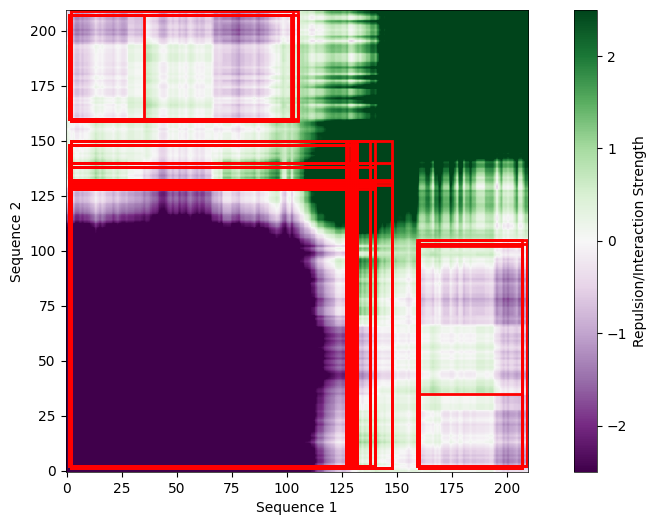

Found 76 regions...

((2, 127), (1, 132))
((2, 127), (1, 140))
((1, 131), (2, 128))
((1, 132), (2, 128))
((1, 131), (2, 129))
((1, 132), (2, 129))
((1, 130), (2, 131))
((1, 130), (2, 132))
((1, 131), (2, 131))
((1, 131), (2, 132))
((1, 132), (2, 131))
((1, 132), (2, 132))
((2, 127), (1, 150))
((1, 140), (2, 128))
((1, 140), (2, 129))
((1, 130), (2, 138))
((1, 131), (2, 138))
((1, 132), (2, 138))
((1, 140), (2, 130))
((1, 140), (2, 131))
((1, 140), (2, 132))
((1, 130), (2, 140))
((1, 131), (2, 140))
((1, 132), (2, 140))
((1, 35), (160, 207))
((1, 102), (160, 207))
((1, 103), (160, 207))
((1, 105), (160, 207))
((2, 128), (1, 131))
((2, 128), (1, 132))
((2, 128), (1, 140))
((2, 128), (1, 150))
((2, 129), (1, 131))
((2, 129), (1, 132))
((2, 129), (1, 140))
((2, 129), (1, 150))
((1, 140), (2, 138))
((1, 130), (2, 148))
((2, 131), (1, 130))
((2, 132), (1, 130))
((2, 138), (1, 130))
((2, 131), (1, 131))
((2, 132), (1, 131))
((2, 138), (1, 131))
((2, 131), (1, 132))
((2, 132), (1, 132))
((2, 1

In [3]:

# find regions
[interactor_pairs, regions, intermap] = domain_analysis.extract_regions(mf, seq_1, seq_2, merge_version=1)

# show on intermap (ok... so yes I renamed this from plot_a_bunch_of_rectangles :-))
domain_analysis.plot_regions_on_intermap(intermap, [regions], ['r'])

n_regions = len(regions)
print(f"Found {n_regions} regions...\n")
for i in regions:
    print(i)


### Possible (probable?) solution
I think the reason this is happening is because the merge algorithm in `get_bidirectional_interaction_regions()` is not doing the full comparisons of rectangles. I implemented an alternative merge algorithm in part of see if it fixed the other issue (which it does) so perhaps this is just the right solution?

With all this in mind, I had two questions:

1. Do we expected the `get_interaction_regions()` to be returning so many regions? The reason this happens is `regions_1` and `regions_2_` have many many regions and I guess that is a bit surprising to me? But MAYBE that's expected and all good!

2. Do you think using this alternative merge algorithm makes sense and/or can you forsee any issues here?


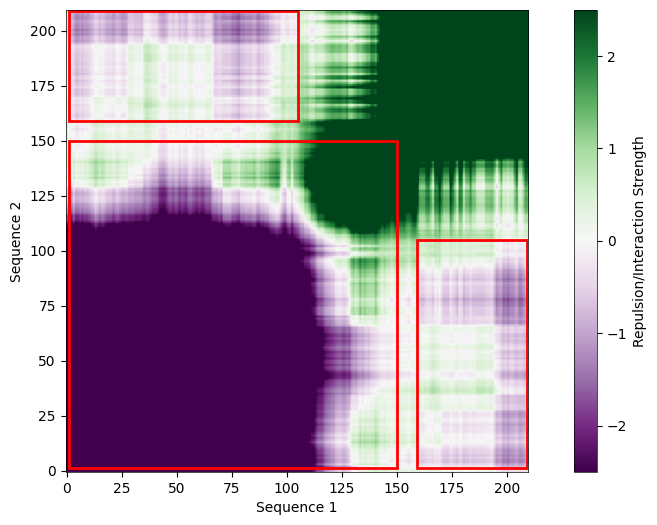

Found 3 regions...

((1, 150), (1, 150))
((1, 105), (159, 209))
((159, 209), (1, 105))


In [4]:
# find regions
[interactor_pairs, regions, intermap] = domain_analysis.extract_regions(mf, seq_1, seq_2, merge_version=2)

# show on intermap (ok... so yes I renamed this from plot_a_bunch_of_rectangles :-))
domain_analysis.plot_regions_on_intermap(intermap, [regions], ['r'])

n_regions = len(regions)
print(f"Found {n_regions} regions...\n")
for i in regions:
    print(i)


# Issue 2; assymetry in rectangle identification
Something I noticed by chance is you can get asymetries in recatangle identification that seem to again come from the original merging code. I actually don't fully understand how this code is working, BUT I will also say those asymetries go away if you use the revised merge code. 

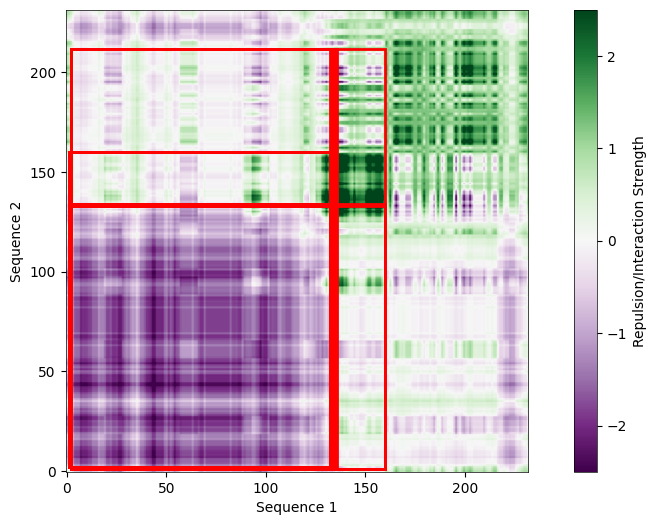

Found 17 regions...

((2, 132), (1, 134))
((2, 132), (1, 212))
((1, 134), (2, 133))
((1, 134), (2, 134))
((1, 133), (2, 134))
((1, 133), (2, 160))
((1, 134), (2, 160))
((2, 133), (1, 134))
((2, 133), (1, 212))
((2, 134), (1, 134))
((2, 134), (1, 212))
((2, 134), (1, 133))
((2, 160), (1, 133))
((2, 160), (1, 134))
((2, 135), (1, 212))
((2, 136), (1, 212))
((2, 160), (1, 212))


In [5]:
ws=9
[interactor_pairs, regions, intermap] = domain_analysis.extract_regions(mf, 
                                                                        seq_1, 
                                                                        seq_2,                                                                         
                                                                        criteria_threshold=-0.3,
                                                                        window_size=ws,
                                                                        merge_version=1)

# show on intermap (ok... so yes I renamed this from plot_a_bunch_of_rectangles :-))
domain_analysis.plot_regions_on_intermap(intermap, [regions], ['r'])

n_regions = len(regions)
print(f"Found {n_regions} regions...\n")
for i in regions:
    print(i)


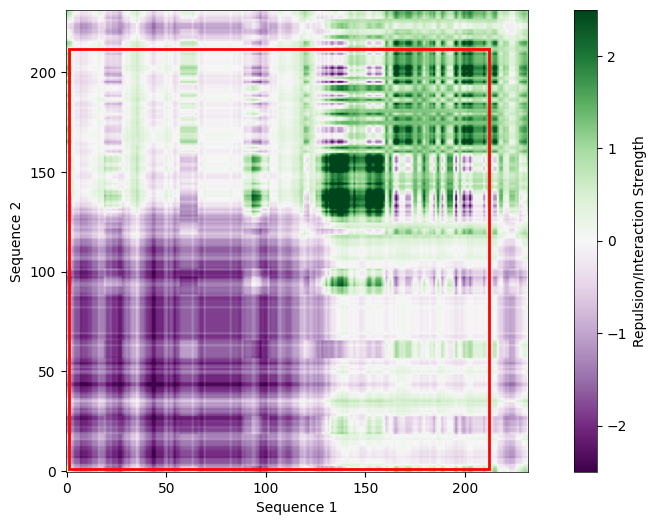

Found 1 regions...

((1, 212), (1, 212))


In [6]:
ws=9
[interactor_pairs, regions, intermap] = domain_analysis.extract_regions(mf, 
                                                                        seq_1, 
                                                                        seq_2,                                                                         
                                                                        criteria_threshold=-0.3,
                                                                        window_size=ws,
                                                                        merge_version=2)

# show on intermap (ok... so yes I renamed this from plot_a_bunch_of_rectangles :-))
domain_analysis.plot_regions_on_intermap(intermap, [regions], ['r'])

n_regions = len(regions)
print(f"Found {n_regions} regions...\n")
for i in regions:
    print(i)


## All that said, it all seems to be working OTHER than these questions?
So I wanted to ask these questions because other than this, I actually think I have everything integrated into the FINCHES main branch. On nice feature is I updated the frontend objects so they can have rectangles drawn on them directly, see below (testing with criteria='greater' just to mix it up!

(<Figure size 2975x2975 with 4 Axes>,
 <Axes: >,
 <Axes: >,
 <Axes: >,
 <Axes: >)

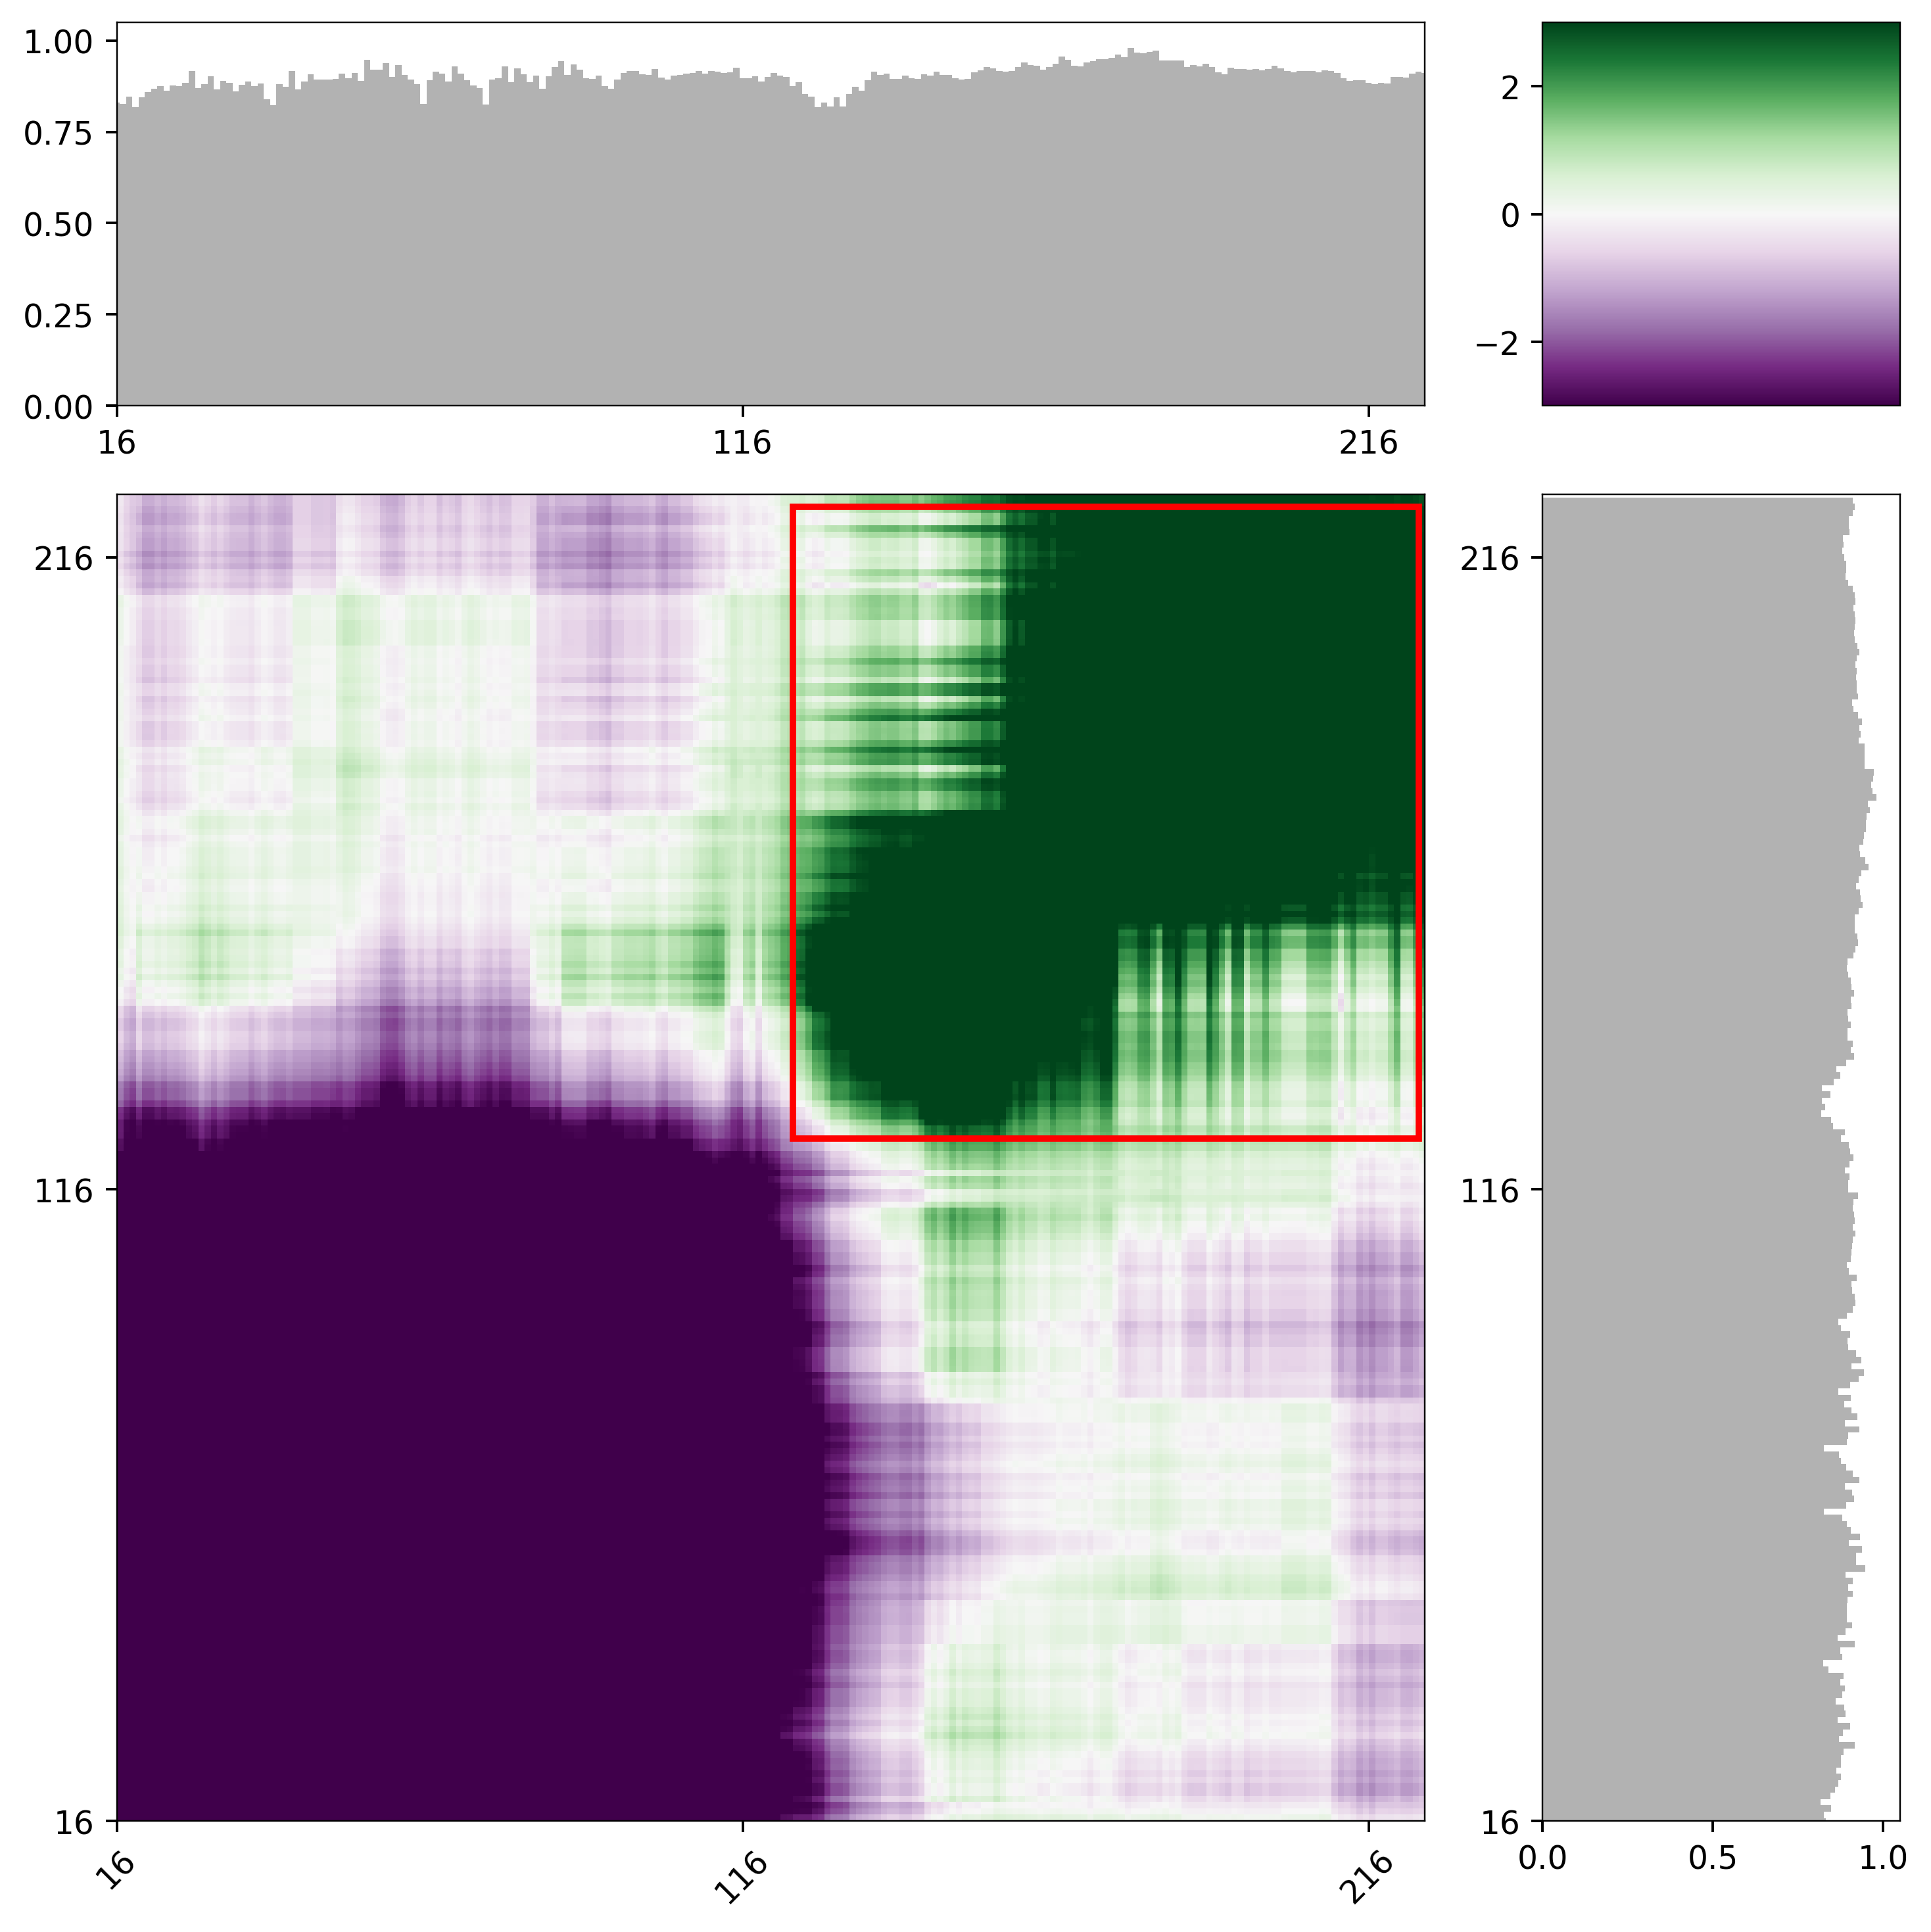

In [18]:
[interactor_pairs, regions, intermap] = domain_analysis.extract_regions(mf, seq_1, seq_2, merge_version=2, criteria='greater', criteria_threshold=1.9)

r

In [55]:
for r1 in regions:

    ref_s1_start = r1[0][0]
    ref_s1_end   = r1[0][1]

    ref_s2_start = r1[1][0]
    ref_s2_end   = r1[1][0]
    
    for r2 in regions:
        pass
        
    

In [58]:
regions

[((2, 127), (1, 132)),
 ((2, 127), (1, 140)),
 ((1, 131), (2, 128)),
 ((1, 132), (2, 128)),
 ((1, 131), (2, 129)),
 ((1, 132), (2, 129)),
 ((1, 130), (2, 131)),
 ((1, 130), (2, 132)),
 ((1, 131), (2, 131)),
 ((1, 131), (2, 132)),
 ((1, 132), (2, 131)),
 ((1, 132), (2, 132)),
 ((2, 127), (1, 150)),
 ((1, 140), (2, 128)),
 ((1, 140), (2, 129)),
 ((1, 130), (2, 138)),
 ((1, 131), (2, 138)),
 ((1, 132), (2, 138)),
 ((1, 140), (2, 130)),
 ((1, 140), (2, 131)),
 ((1, 140), (2, 132)),
 ((1, 130), (2, 140)),
 ((1, 131), (2, 140)),
 ((1, 132), (2, 140)),
 ((1, 35), (160, 207)),
 ((1, 102), (160, 207)),
 ((1, 103), (160, 207)),
 ((1, 105), (160, 207)),
 ((2, 128), (1, 131)),
 ((2, 128), (1, 132)),
 ((2, 128), (1, 140)),
 ((2, 128), (1, 150)),
 ((2, 129), (1, 131)),
 ((2, 129), (1, 132)),
 ((2, 129), (1, 140)),
 ((2, 129), (1, 150)),
 ((1, 140), (2, 138)),
 ((1, 130), (2, 148)),
 ((2, 131), (1, 130)),
 ((2, 132), (1, 130)),
 ((2, 138), (1, 130)),
 ((2, 131), (1, 131)),
 ((2, 132), (1, 131)),
 ((2

In [7]:
interactor_pairs[0][0]

['GVGAGLGAGVNQRMDSYAHMNGWSNGSYSMMQDQLGYPQHPGLNAHGAAQMQPMHRYDVSALQYNSMTSSQTYMNGSPTYSMSYSQQ',
 143,
 230]

In [15]:
x=mf.intermolecular_idr_matrix(seq_1,seq_2)[0][0]


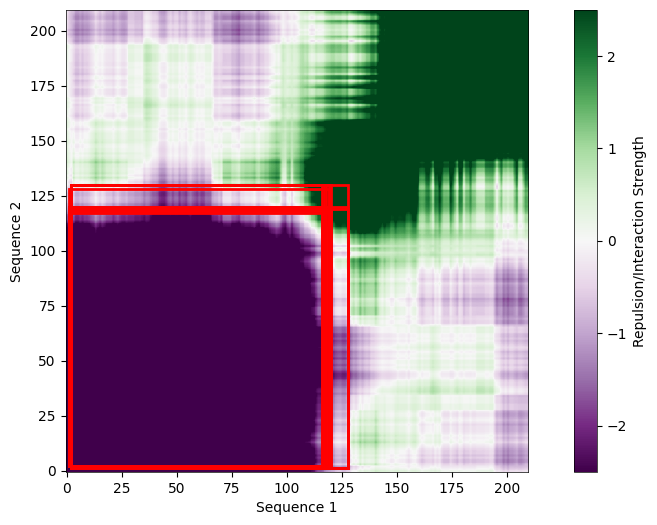

In [18]:






intermap_raw = domain_analysis.get_raw_intermap_mpipi(seq_1, seq_2)

regions = domain_analysis.get_bidirectional_interaction_regions(intermap_raw, "less", -0.9, 0.6, 500)

domain_analysis.plot_regions_on_intermap(intermap_raw, [regions], ["red"])

In [17]:
regions

[((2, 116), (1, 120)),
 ((2, 116), (1, 130)),
 ((1, 120), (2, 117)),
 ((1, 120), (2, 118)),
 ((1, 119), (2, 120)),
 ((1, 120), (2, 120)),
 ((2, 117), (1, 120)),
 ((2, 117), (1, 130)),
 ((2, 118), (1, 120)),
 ((2, 118), (1, 130)),
 ((1, 119), (2, 128)),
 ((2, 120), (1, 119)),
 ((2, 128), (1, 119)),
 ((2, 120), (1, 120)),
 ((2, 128), (1, 120)),
 ((2, 119), (1, 130)),
 ((2, 120), (1, 130)),
 ((2, 128), (1, 130))]